<a href="https://colab.research.google.com/github/veera9784/play-store-app-review-analysis/blob/main/capstone_project_playstore_app_review_analysis_done_by_veera_alma_better_EDA_Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
play_store = pd.read_csv("Play Store Data.csv")
users = pd.read_csv("User Reviews.csv")

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
users.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
play_store.shape

(10841, 13)

In [ ]:
users.shape

(64295, 5)

In [ ]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# from here we are cleaning the data
play_store=play_store.drop_duplicates()

In [ ]:
play_store.shape

(10358, 13)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store =play_store.replace('[+,$]','',regex=True)
play_store.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up


In [ ]:
play_store.dropna(subset=['Rating'],axis='rows',inplace = True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
users['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [ ]:
# here we are displaying the nan columns in only android version column
#android version
play_store[play_store['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,July 20 2018,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0,Everyone,Personalization,March 27 2018,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000,Free,0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up,NaN


In [ ]:
play_store['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1094
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             331
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [ ]:
play_store['Android Ver'].mode()

0    4.1 and up
dtype: object

In [ ]:
play_store['Android Ver'].mode()[0]

'4.1 and up'

In [ ]:
play_store['Android Ver'].fillna(play_store['Android Ver'].mode()[0],inplace=True)

In [ ]:
# here you can see android version colukn is clean
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [ ]:
#current version
play_store['Current Ver'].value_counts()

Varies with device    1258
1.0                    451
1.1                    191
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: Current Ver, Length: 2639, dtype: int64

In [ ]:
play_store['Current Ver'].mode()

0    Varies with device
dtype: object

In [ ]:
play_store['Current Ver'].mode()[0]

'Varies with device'

In [ ]:
play_store['Current Ver'].fillna(play_store['Current Ver'].mode()[0],inplace=True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#content ratting
play_store['Content Rating'].value_counts()

Everyone          7095
Teen              1022
Mature 17          411
Everyone 10        360
Adults only 18       3
Unrated              1
Name: Content Rating, dtype: int64

In [ ]:
play_store.dropna(subset=['Content Rating'],axis='rows',inplace=True)

In [ ]:
# here you can see your data is cleaned in play_store
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
play_store.shape

(8892, 13)

In [ ]:
play_store.corr()

,Rating
Rating,1.0


In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


In [ ]:
#category column operation
#checking values in category column


In [ ]:
pd.DataFrame(play_store['Category'].value_counts())

,Category
FAMILY,1718
GAME,1074
TOOLS,734
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,310
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304
MEDICAL,302


In [ ]:
#ratting column operation


In [ ]:
play_store['Rating'].value_counts()

4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [ ]:
play_store['Rating']=play_store['Rating'].astype('float')


In [ ]:
#review column operation

In [ ]:

play_store['Reviews']=play_store['Reviews'].astype('int')

In [ ]:
#install column operation

In [ ]:
play_store['Installs']=play_store['Installs'].astype('int')

In [ ]:
play_store['Installs'].value_counts()

1000000       1486
10000000      1132
100000        1110
10000          989
1000           698
5000000        683
500000         516
50000          462
5000           426
100000000      369
100            303
50000000       272
500            199
10              69
500000000       61
50              56
1000000000      49
5                9
1                3
Name: Installs, dtype: int64

In [ ]:
#size column operation

In [ ]:
play_store['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
#value contain M,K,vries with device

In [ ]:
play_store['Size']=play_store['Size'].map(
    lambda value:
        str(int(float(value.strip('M'))*1024)) if value[-1]=='M' else value
)
play_store['Size']=play_store['Size'].map(
    lambda value:
        str(value.rstrip('k')) if value[-1]=='k' else value
)
play_store['Size']=play_store['Size'].map(
    lambda value:
        np.nan if value=='Varies with device' else value
)

In [ ]:
play_store['Size'].unique()

array(['19456', '14336', '8908', '25600', '2867', '5734', '29696',
       '33792', '3174', '28672', '12288', '20480', '21504', '37888',
       '2764', '5632', '17408', '39936', '31744', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', '24576', nan, '9625',
       '15360', '10240', '1228', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '22528', '6553',
       '3276', '8396', '5017', '9728', '5120', '6041', '13312', '74752',
       '6963', '3584', '4096', '2355', '2150', '43008', '9318', '56320',
       '23', '7475', '6656', '1536', '7680', '52224', '41984', '49152',
       '8704', '47104', '8499', '4403', '4812', '3379', '40960', '7987',
       '9011', '6758', '5222', '62464', '67584', '79', '8601', '37

In [ ]:
#price column operation

In [ ]:
play_store['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [ ]:

play_store['Price'] = play_store['Price'].astype('float')

In [ ]:
#last updatedcolumn
play_store['Last Updated'] = pd.to_datetime(play_store['Last Updated'])
play_store['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 8892, dtype: datetime64[ns]

In [ ]:
play_store['lastupdated_day'] = play_store['Last Updated'].dt.day
play_store['lastupdated_month'] = play_store['Last Updated'].dt.month
play_store['LastUpdated_year'] = play_store['Last Updated'].dt.year

In [ ]:
#last updated column we made that to three dierent columns like last updated day,last updated month,last updated year 
play_store.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdated_day,lastupdated_month,LastUpdated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018


In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                8892 non-null   object        
 1   Category           8892 non-null   object        
 2   Rating             8892 non-null   float64       
 3   Reviews            8892 non-null   int64         
 4   Size               7424 non-null   object        
 5   Installs           8892 non-null   int64         
 6   Type               8892 non-null   object        
 7   Price              8892 non-null   float64       
 8   Content Rating     8892 non-null   object        
 9   Genres             8892 non-null   object        
 10  Last Updated       8892 non-null   datetime64[ns]
 11  Current Ver        8892 non-null   object        
 12  Android Ver        8892 non-null   object        
 13  lastupdated_day    8892 non-null   int64         
 14  lastupd

In [ ]:
# users dataframe operation

In [ ]:
users = users.dropna(subset=['Translated_Review'],how='all')
users.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
users.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
play_store['Type'].value_counts()

Free    8279
Paid     613
Name: Type, dtype: int64

In [ ]:
#Data viszualization starts from here 

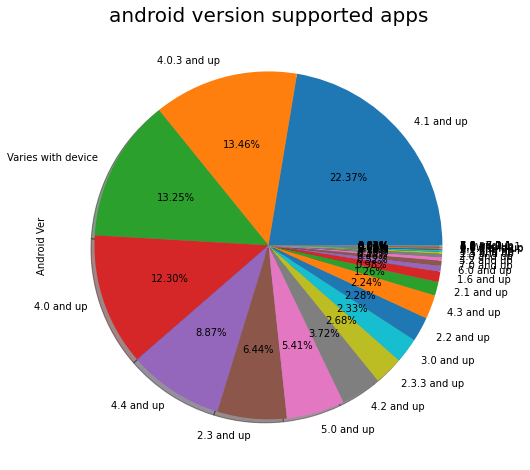

In [ ]:
#most andriod version vs supported version in playstore
plt.figure(figsize=(15,8))
play_store['Android Ver'].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=True)
plt.title('android version supported apps',size=20)
plt.show()

Text(0.5, 1.0, 'Top categories on playstore')

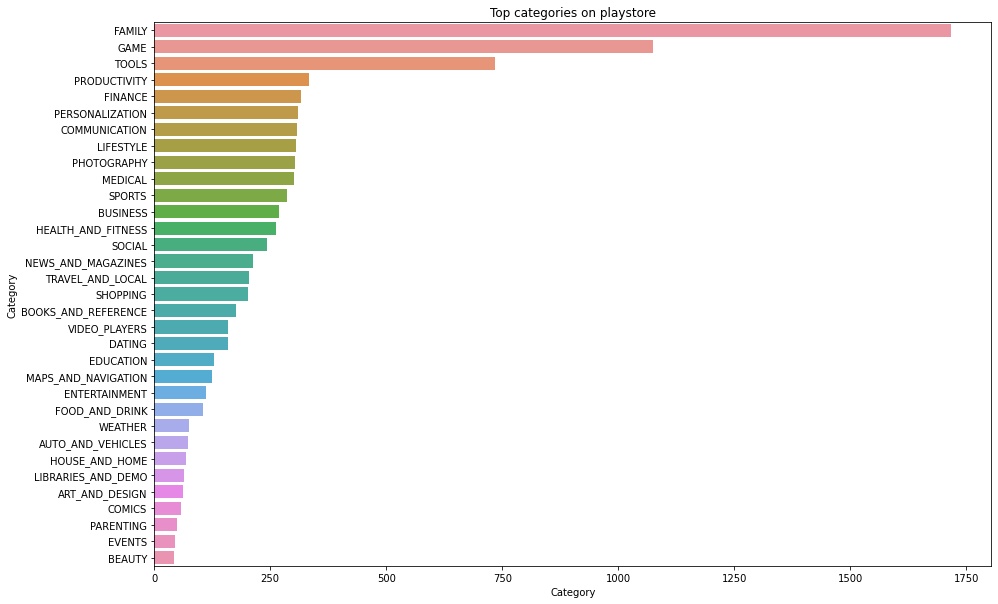

In [ ]:
# Top categories in playstore
plt.figure(figsize=(15,10))

y=play_store['Category'].value_counts().index
x=play_store['Category'].value_counts()
plt.xlabel('count')
plt.ylabel('Category')
graph =sns.barplot(x,y)
graph.set_title("Top categories on playstore")

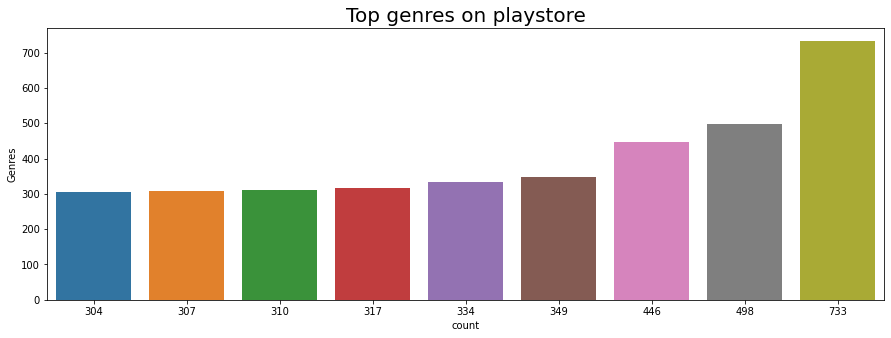

In [ ]:
#Top 10 genres in playstore
y = play_store['Genres'].value_counts().index
x = play_store['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(x[i])


plt.figure(figsize=(15,5))
plt.xlabel('count')
plt.ylabel('Genres')

graph = sns.barplot(x=xsisG, y=ysisG,)
graph.set_title('Top genres on playstore',fontsize = 20);

Text(0.5, 1.0, 'most frequent ratting')

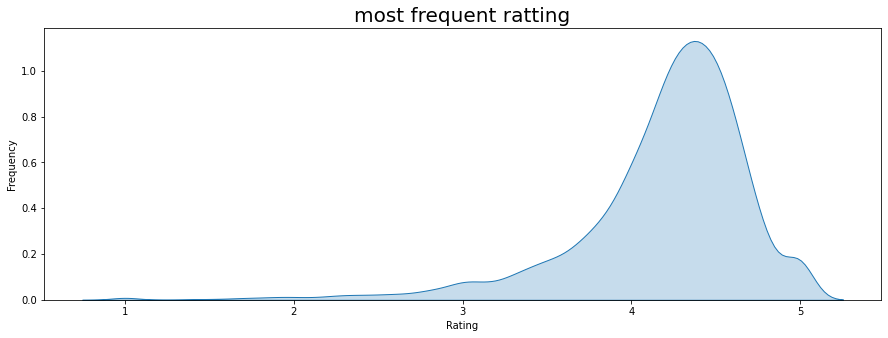

In [ ]:
#most frequent ratting app on playstore
plt.figure(figsize=(15,5))
plt.xlabel('Rating')
plt.ylabel('Frequency')
graph = sns.kdeplot(play_store.Rating,shade=True)
plt.title('most frequent ratting',size=20)

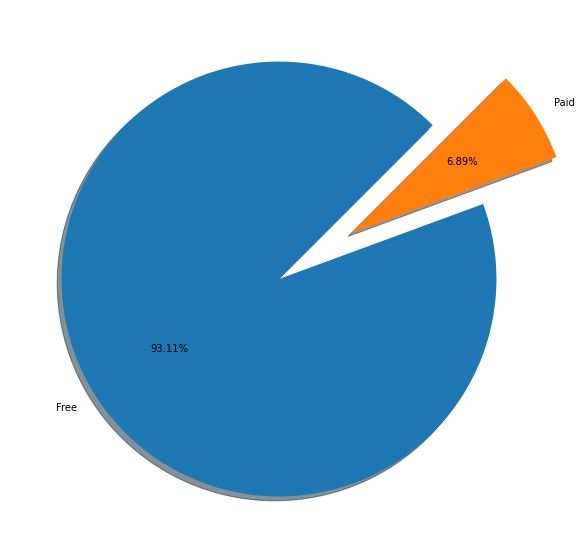

In [ ]:
#Paid & free app ratios across playstore
plt.figure(figsize=(15,10))
x=play_store['Type'].value_counts()
label = ['Free','Paid']
plt.pie(x,labels=label,autopct='%1.2f%%',shadow=True,explode=[0,0.4],startangle=45)
plt.show()

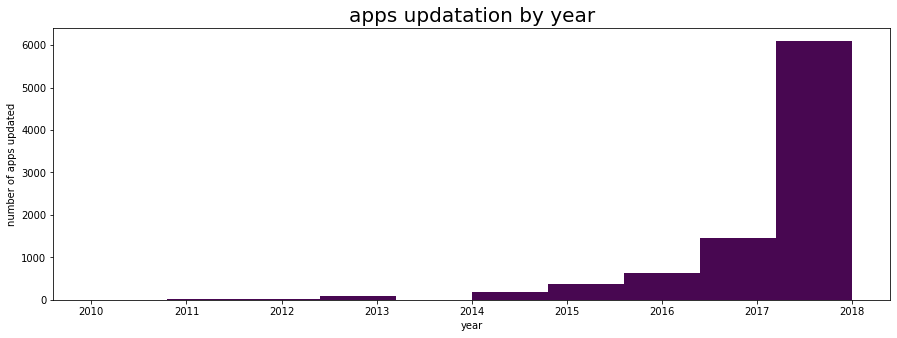

In [ ]:
#apps updatation by year
plt.figure(figsize=(15,5))
plt.title('apps updatation by year',fontsize=20)
ax = plt.hist(play_store.LastUpdated_year,color="#480751")
plt.tick_params(left="on",bottom="on")
plt.xlabel("year")
plt.ylabel("number of apps updated");
plt.show()


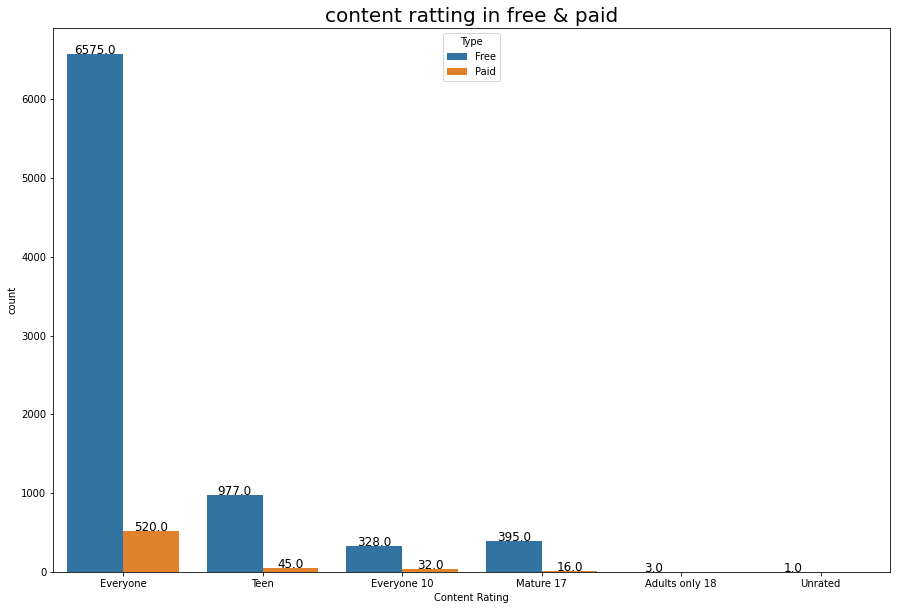

In [ ]:
#Age wise free & paid users details
plt.figure(figsize=(15,10))
ax = sns.countplot(play_store['Content Rating'],hue=play_store['Type']);
plt.title('content ratting in free & paid',size=20)

for p in ax .patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',size='12')
plt.show()

In [ ]:
#apps size across database

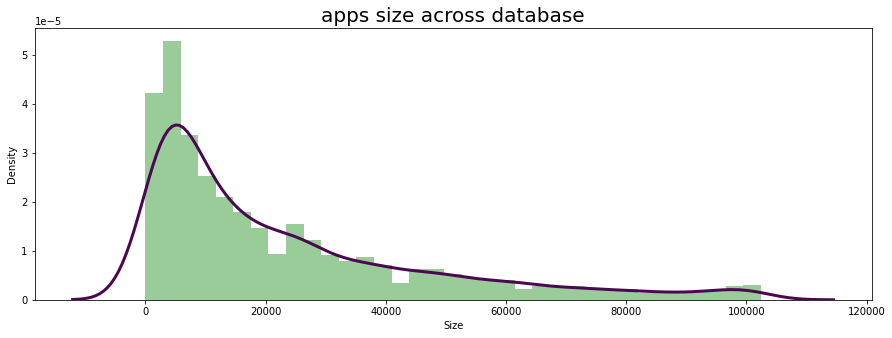

In [ ]:
#apps size across database
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.distplot(play_store['Size'],color='g',kde_kws={'linewidth':3,'color':'#4B0751'})
plt.title('apps size across database', size = 20)
plt.show()

In [ ]:
# sentiment data across the all reviews

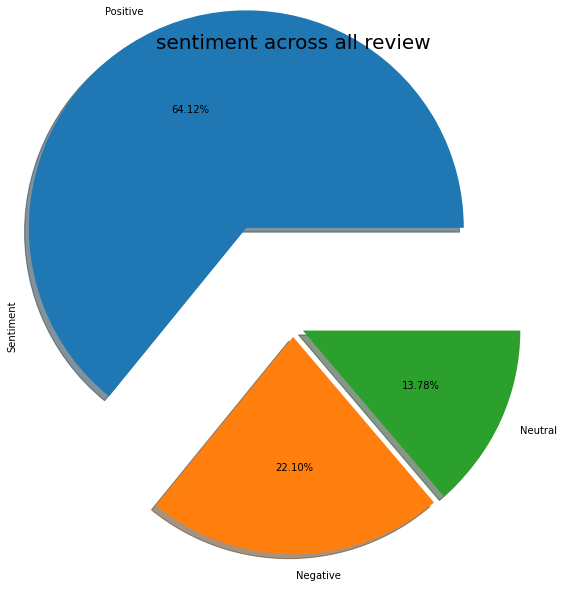

In [ ]:
# sentiment data across the all reviews
plt.figure(figsize=(15,10))
pd.value_counts(users['Sentiment']).plot(kind='pie',autopct='%.2f%%',shadow=True,explode=[0.5,0.05,0.05])
plt.title('sentiment across all review',fontsize=20)
plt.show()

In [ ]:
#app pricing trend across popular categories

Text(0.5, 1.0, 'apps pricing trend across popular categories')

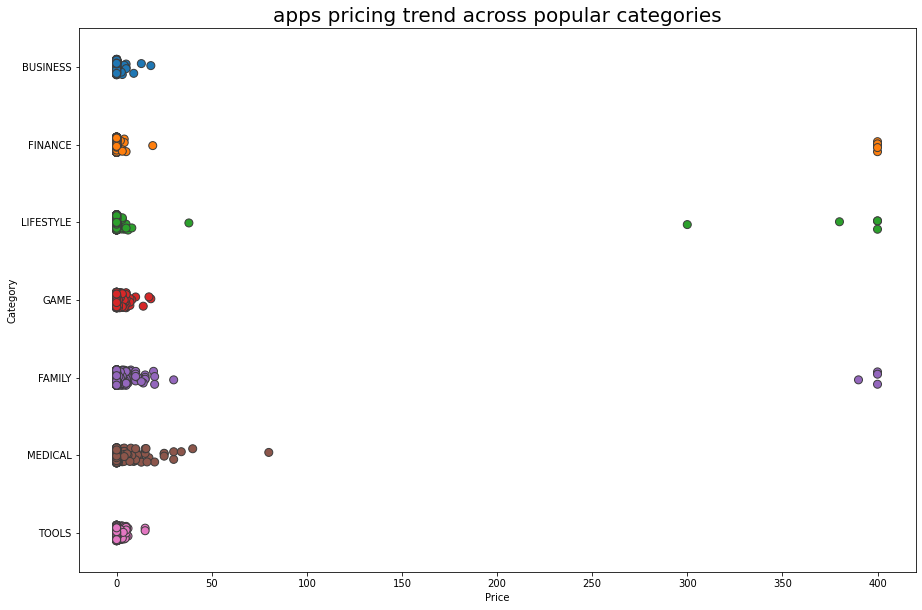

In [ ]:
#app pricing trend across popular categories
plt.figure(figsize=(15,10))
popular_apps_cat = play_store[play_store.Category.isin(['GAME','FAMILY','PHOTOGRAPH','MEDICAL','TOOLS','FINANCE','LIFESTYLE','BUSINESS'])]

ax=sns.stripplot(x=popular_apps_cats['Price'],y= popular_apps_cat['Category'],jitter=True, linewidth=1, size=8)
ax.set_title('apps pricing trend across popular categories',size=20)
                                              

In [ ]:
#sentiment popularity between paid & free

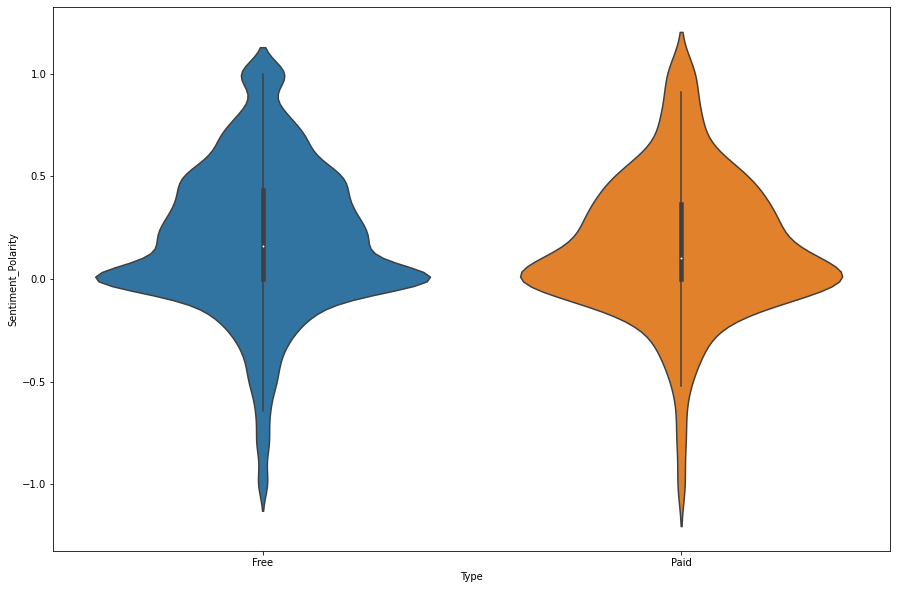

In [ ]:
#sentiment popularity between paid & free
plt.figure(figsize=(15,10))
sns.violinplot(y=users['Sentiment_Polarity'],x=play_store['Type'],platte='Blues')
plt.show()

In [ ]:
# sentiment ratting relation with sentiment popularity

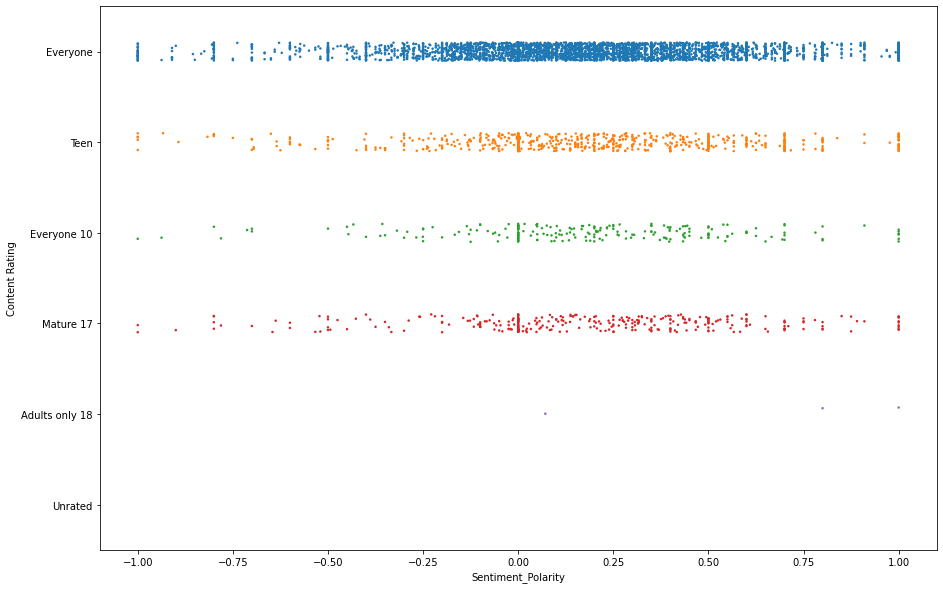

In [ ]:
# sentiment ratting relation with sentiment popularity
plt.figure(figsize=(15,10))

ax= sns.stripplot(y=play_store['Content Rating'],x=users['Sentiment_Polarity'],size=2.5)
plt.show()

In [ ]:
# categories relation with sentiment subjectivity

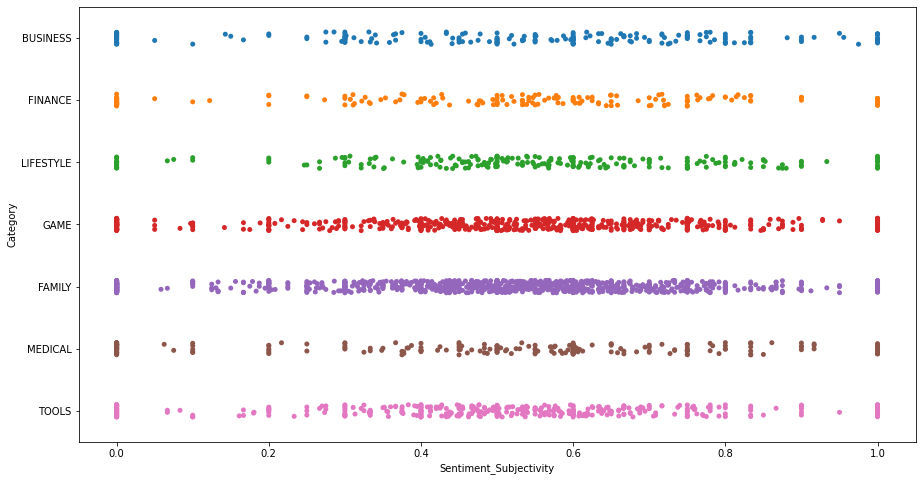

In [ ]:
# categories relation with sentiment subjectivity
plt.figure(figsize=(15,8))
ax=sns.stripplot(y=popular_apps_cats['Category'],x=users['Sentiment_Subjectivity'])
plt.show()

In [ ]:
!jupyter nbconvert --to PDF "Untitled.ipynb"


[NbConvertApp] WARNING | pattern 'Untitled.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex